# DBSCAN - Density-based spatial clustering of applications with noise

DBSCAN is one of the most common data clustering algorithms, developed in 1996 by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu. It is a density-based clustering non-parametric algorithm; it groups together points with many nearby neighbours and marks points that lie in low-density regions as outliers.

In [4]:
import csv
import pandas as pd
import numpy as np

filename='Questions.csv'

#Read csv
pdf = pd.read_csv(filename)
pdf = pdf.drop(columns=['ID', 'Type', 'Points', 'Correct Answer', 'Choice 1', 'Choice 2', 'Choice 3', 'Choice 4', 'Choice 5', 'Choice 6', 'Choice 7', 'Choice 8', 'Choice 9', 'Choice 10'], axis=1)
pdf


,Question,Explanation
0,<p>Suppose you try to perform a binary search ...,<p>Only the middle element will be found. The ...
1,<p>Which data structure used to implement&nbsp...,<p>Implementing Set.contains involves a search...
2,"\n<p><img src=""img/1.png"" alt=""no description""...",\n<p>D is the best: super.fly(place) invokes B...
3,"<p>For a graph with N nodes, what's the minimu...",<p>A vertex with an edge to itself is a cycle....
4,\n<p>Read the following method skeleton and ch...,<p>The return type of the method is <code>int<...
...,...,...
751,<p>The worst-case time complexity of quicksort...,"\n<p>In the worst case, every time we partitio..."
752,\n<p>The following is a skeleton for a method ...,<p>a)<br>INCORRECT<br>The loop starts at last ...
753,\n<p>The following is a skeleton for a method ...,\n<p>a)</p>\n<p>CORRECT!</p>\n<p>b)</p>\n<p>IN...
754,\n<p>The following is a skeleton for a method ...,\n<p>a)</p>\n<p>INCORRECT:</p>\n<p><span style...


In [5]:
import re
import os
import sys
import string
import codecs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# write demo on sklearn!!!!!!!!!!
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram
from scipy.spatial.distance import cosine
from scipy.stats.stats import pearsonr

# For text pre-processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

#### Text Preprocessing


In [6]:
# Removing punctuation
pdf['Questions_P1'] = pdf['Question'].map(lambda x: re.sub('[,\.!?:></="-;]', ' ', x))

# Tokenizing
tokenizer = RegexpTokenizer(r'\w+')
pdf['Questions_P2'] = pdf['Questions_P1'].apply(lambda x: tokenizer.tokenize(x.lower()))

# Stop words removal
nltk.download('stopwords')
stop = stopwords.words('english')
stop.append('nbsp')
pdf['Questions_P2'] = pdf['Questions_P2'].apply(lambda x: [item for item in x if item not in stop])

# Stemming using Porter
#ps = PorterStemmer()
#def word_stemmer(text):
#    stem_text = ' '.join([ps.stem(i) for i in text])
#    return stem_text

#pdf['Questions_P3'] = pdf['Questions_P2'].apply(lambda x: word_stemmer(x))

# Lemmatizing
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def word_lemmatizer(text):
    stem_text = ' '.join([lemmatizer.lemmatize(i) for i in text])
    return stem_text

pdf['Questions_P3'] = pdf['Questions_P2'].apply(lambda x: word_lemmatizer(x))

# Removing short words
pdf['Questions_P'] = pdf['Questions_P3'].map(lambda x: re.sub(r'\b\w{1,2}\b', '', x))
pdf['Questions_P'].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


0     suppose try perform binary search element arr...
1     data structure used implement code set code y...
2     img src img png alt description   simplified ...
3     graph  node minimum number edge must contain ...
4     read following method skeleton choose best ex...
Name: Questions_P, dtype: object

In [7]:
# Filter and pre-process each essay to get a processed list of sentences
nltk.download('punkt')

essay1_sents = pdf['Questions_P']
text_list1 = [re.sub("[,.!?\;\”\“\’-]", ' ', sentence) for sentence in essay1_sents] # Cleaned list of sentences
names1 = range(len(text_list1)) # Index number of each sentence

print(text_list1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[' suppose try perform binary search element array sorted reverse order binary search algorithm expects many item array found searched ', ' data structure used implement code set code yield worst performance code set contains code ', ' img src img png alt description   simplified uml diagram show relationship among java class bird crow duck   suppose bird fly location place method want crow makenoise take behave like bird assuming crow makenoise method ', ' graph  node minimum number edge must contain cycle ', ' read following method skeleton choose best expression fill blank strong line strong method behave correctly  pre lang text  java take string reference count number time character appears string object param astring string reference object containing char precondition astring null may assume true return number time appears string public static int countas string astring line

In [8]:
# Build DBSCAN model with Tf-idf vectorizer
tfidfvec = TfidfVectorizer(ngram_range=(1,5), min_df = 0.1, max_df = 1.0, decode_error = "ignore")

In [9]:
# Run DBSCAN with essay1
X1 = tfidfvec.fit_transform(text_list1).toarray()
db1 = DBSCAN(eps=0.8, min_samples=3).fit(X1)
core_samples_mask = np.zeros_like(db1.labels_, dtype=bool)
core_samples_mask[db1.core_sample_indices_] = True
labels1 = db1.labels_
n_clusters_ = len(set(labels1)) - (1 if -1 in labels1 else 0) # Number of clusters in labels
print(labels1)
print()

clusters1 = {}
for c, i in enumerate(labels1):
    if i == -1:
        continue
    elif i in clusters1:
        clusters1[i].append( text_list1[c] )
    else:
        clusters1[i] = [text_list1[c]]
for c in clusters1:
    print(clusters1[c])
    print()

[ 0  0  0  1  0  1  0  1  1  0  0  0  0  0  1  0  0  1  0  0  0  0  0  1
  0  0  0  0  0  0  1  0  0  0  1  1  1  1  1  1  0  0  0  0  0  0  0  0
  0  0  0  0  0  1  0  0  1  0  0  1  1  0  1  1  0  0  0  1  0  0  0  0
  1  0  0  0  0  0  1  1  0  1  0  0  1  1  0  1  0  0  0  0  0  0  1  2
  0  1  0  0  0  0  0  1  0  1  0  1  1  0  0  0  0  0  1  0  0  1  0  0
  0  0  0  1  0  0  0  0  0  0  1  0  0  0  1  1  1  1  1  1  0  0  0  0
  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  1  1  0  1  1  0  0  0  1
  0  0  0  0  1  0  0  0  0  0  1  1  0  1  0  0  1  1  0  1  0  0  0  0
  0  0  1  2  0  1  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0
  0  1  1  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  1  1  1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  1
  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  1
  0  0  1  1  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  1  0  1  0
  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0

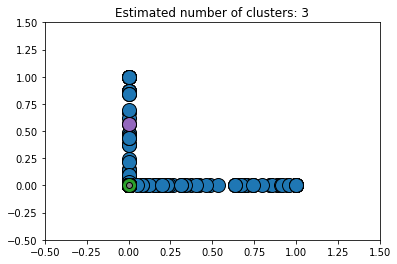

In [10]:
# Plotting Tool Source: http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html
unique_labels = set(labels1)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels1 == k)
    xy = X1[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markeredgecolor='k', markersize=14)
    xy = X1[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markeredgecolor='k', markersize=6)
    
plt.axis([-0.5, 1.5, -0.5, 1.5])
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()